In [6]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [51]:
df.groupby('cntry').size()

cntry
CH    1546
CZ    1316
DE      28
ES    2426
NO    1462
SE    1816
dtype: int64

Initially I chose Germany, however the sample size for Germany is significantly less than all other countries, so I will swap Germany out for Sweden.

# Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.**

In [5]:
df.year.unique()

array([6, 7])

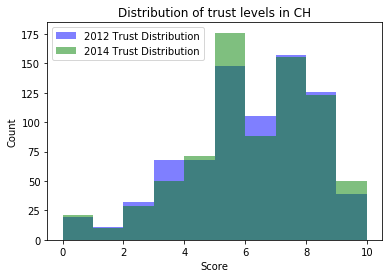

The probability of people in CH having a similar level of trust between 2012 and 2014 is 0.49770110247151234


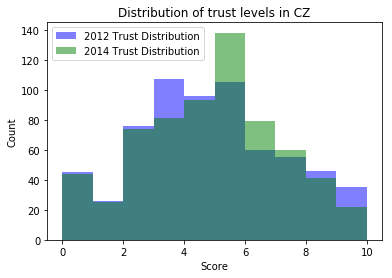

The probability of people in CZ having a similar level of trust between 2012 and 2014 is 0.6337663626856563


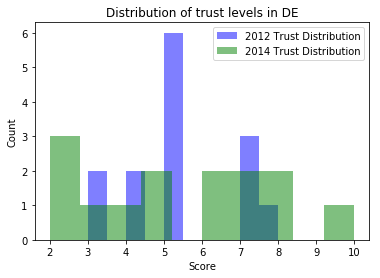

The probability of people in DE having a similar level of trust between 2012 and 2014 is 0.8578926631223287


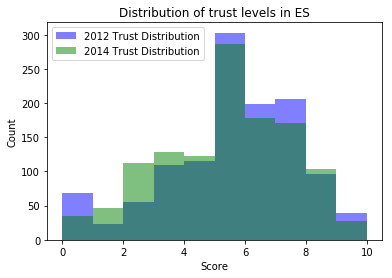

The probability of people in ES having a similar level of trust between 2012 and 2014 is 0.012687599930326627


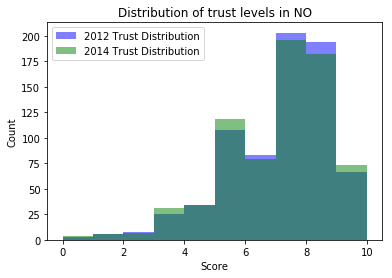

The probability of people in NO having a similar level of trust between 2012 and 2014 is 0.5866849635988214


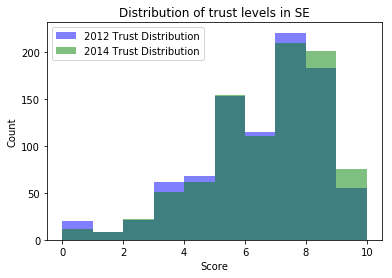

The probability of people in SE having a similar level of trust between 2012 and 2014 is 0.03683208699520371


In [8]:
for country in df.cntry.unique():
    y1 = df.query("cntry == '{}' & year == {}".format(country, 6))
    y2 = df.query("cntry == '{}' & year == {}".format(country, 7))
    y1.dropna(subset = ['ppltrst'], inplace = True)
    y2.dropna(subset = ['ppltrst'], inplace = True)
    plt.hist(y1.ppltrst, color = 'blue', alpha = 0.5, label = '2012 Trust Distribution')
    plt.hist(y2.ppltrst, color = 'green', alpha = 0.5, label = '2014 Trust Distribution')
    plt.title("Distribution of trust levels in " + country)
    plt.ylabel('Count')
    plt.xlabel('Score')
    plt.legend()
    plt.show()
    statistic, pvalue = stats.ttest_ind(y1.ppltrst, y2.ppltrst)
    print('The probability of people in {} having a similar level of trust between 2012 and 2014 is {}'.format(country, pvalue))

# Did people become happier from 2012 to 2014? Compute results for each country in the sample.

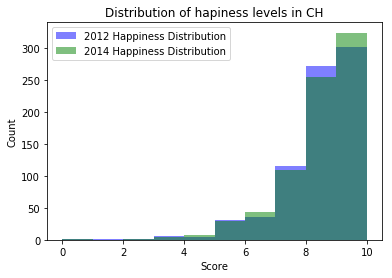

The probability of people in CH having a similar level of happiness between 2012 and 2014 is 0.3182821295694425


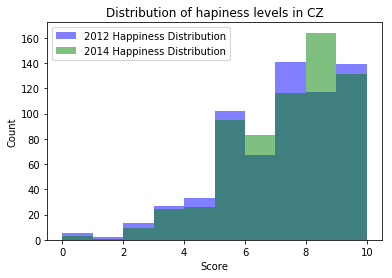

The probability of people in CZ having a similar level of happiness between 2012 and 2014 is 0.11623843847325477


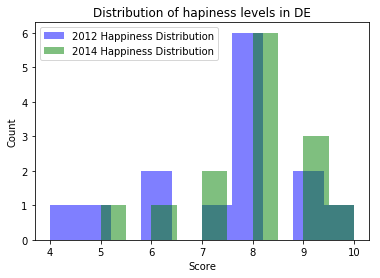

The probability of people in DE having a similar level of happiness between 2012 and 2014 is 0.27394753519380677


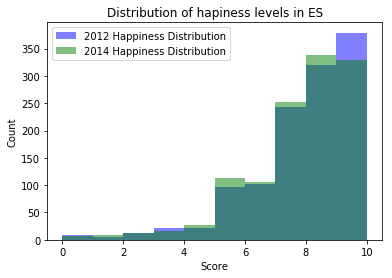

The probability of people in ES having a similar level of happiness between 2012 and 2014 is 0.021580512353495184


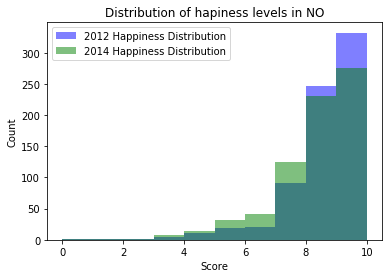

The probability of people in NO having a similar level of happiness between 2012 and 2014 is 6.076793252063054e-06


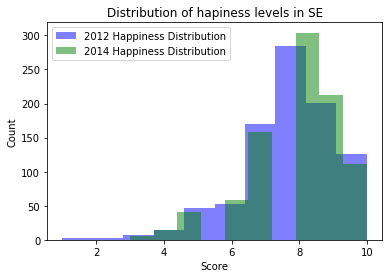

The probability of people in SE having a similar level of happiness between 2012 and 2014 is 0.4111526456468455


In [9]:
for country in df.cntry.unique():
    y1 = df.query("cntry == '{}' & year == {}".format(country, 6))
    y2 = df.query("cntry == '{}' & year == {}".format(country, 7))
    y1.dropna(subset = ['happy'], inplace = True)
    y2.dropna(subset = ['happy'], inplace = True)
    plt.hist(y1.happy, color = 'blue', alpha = 0.5, label = '2012 Happiness Distribution')
    plt.hist(y2.happy, color = 'green', alpha = 0.5, label = '2014 Happiness Distribution')
    plt.title("Distribution of hapiness levels in " + country)
    plt.ylabel('Count')
    plt.xlabel('Score')
    plt.legend()
    plt.show()
    statistic, pvalue = stats.mannwhitneyu(y1.happy, y2.happy)
    print('The probability of people in {} having a similar level of happiness between 2012 and 2014 is {}'.format(country, pvalue))

# Who reported watching more TV in 2012, men or women?

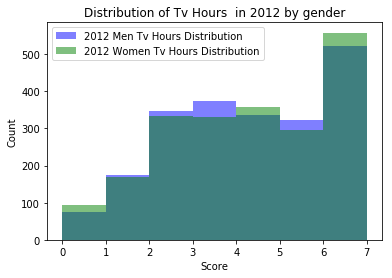

The probability of men and women watched similar amounts of TV in 2012 is 0.22382598497660156


In [13]:
y1_men = df.query("gndr == '{}' & year == {}".format(1, 6)).dropna(subset = ['tvtot'])
y1_women = df.query("gndr == '{}' & year == {}".format(2, 6)).dropna(subset = ['tvtot'])
plt.hist(y1_men.tvtot, color = 'blue', alpha = 0.5, label = '2012 Men Tv Hours Distribution', bins = 7)
plt.hist(y1_women.tvtot, color = 'green', alpha = 0.5, label = '2012 Women Tv Hours Distribution', bins = 7)
plt.title("Distribution of Tv Hours  in 2012 by gender")
plt.ylabel('Count')
plt.xlabel('Score')
plt.legend()
plt.show()
statistic, pvalue = stats.mannwhitneyu(y1_men.tvtot, y1_women.tvtot)
print('The probability of men and women watched similar amounts of TV in 2012 is {}'.format(pvalue))

So no statistically significant difference in men and women watching TV in 2012.

# Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

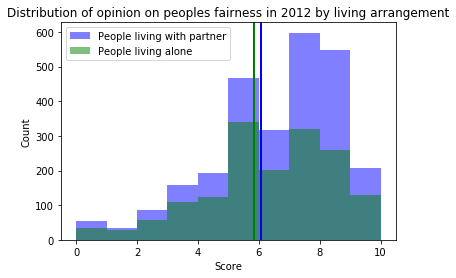

The probability of couples and people living alone having similar views on people being fair is 0.0001


In [14]:
partner = df.query("year == 6 & partner == 1").dropna(subset = ['pplfair'])
no_partner = df.query("year == 6 & partner == 2").dropna(subset = ['pplfair'])

plt.hist(partner.pplfair, color = 'blue', alpha = 0.5, label = 'People living with partner')
plt.axvline(partner.pplfair.mean(), color='blue', linestyle='solid', linewidth=2)
plt.hist(no_partner.pplfair, color = 'green', alpha = 0.5, label = 'People living alone')
plt.axvline(no_partner.pplfair.mean(), color='green', linestyle='solid', linewidth=2)
plt.title("Distribution of opinion on peoples fairness in 2012 by living arrangement")
plt.ylabel('Count')
plt.xlabel('Score')
plt.legend()
plt.show()

statistic, pvalue = stats.mannwhitneyu(partner.pplfair, no_partner.pplfair)
print('The probability of couples and people living alone having similar views on people being fair is {}'.format(round(pvalue, 4)))

Not surprisingly, people who did not live with a partner were statistically significantly less likely to believe people were fair in 2012 than people who did live with a partner.

# Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

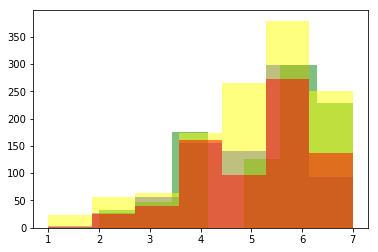

The probability that Switzerland, Sweden, Spain, and Norway all met socialially 
in similar distributions is 9.630426325908598e-05


In [54]:
data = df[(df.cntry.isin(['CH', 'SE', 'ES', 'NO'])) & (df.year == 7)]
data.dropna(subset = ['sclmeet'], inplace=True)

plt.hist(data.query("cntry == 'CH'").sclmeet, color = 'blue', 
         alpha = 0.5, label = 'Switzerland', bins = 7)
plt.hist(data.query("cntry == 'SE'").sclmeet, color = 'green', 
         alpha = 0.5, label = 'Sweden', bins = 7)
plt.hist(data.query("cntry == 'ES'").sclmeet, color = 'yellow', 
         alpha = 0.5, label = 'Spain', bins = 7)
plt.hist(data.query("cntry == 'NO'").sclmeet, color = 'red', 
         alpha = 0.5, label = 'Norway', bins = 7)
plt.show()

statistic, pvalue = stats.kruskal(data.query("cntry == 'CH'").sclmeet,
                                  data.query("cntry == 'SE'").sclmeet,
                                  data.query("cntry == 'ES'").sclmeet,
                                  data.query("cntry == 'NO'").sclmeet)

print('The probability that Switzerland, Sweden, Spain, and Norway all met socialially \n' +
      'in similar distributions is {}'.format(pvalue))

So there is definitely significant differences in how people in these countries meet socially.

In [57]:
statistic, pvalue = stats.ttest_ind(data[data.cntry=='CH'].sclmeet,
                                  data[data.cntry=='SE'].sclmeet)
print('Chance of similarity between Switzerland and Sweden is {}'.format(pvalue))

Chance of similarity between Switzerland and Sweden is 5.654598600313532e-05


In [67]:
statistic, pvalue = stats.ttest_ind(data[data.cntry=='CH'].sclmeet,
                                  data[data.cntry=='ES'].sclmeet)
print('Chance of similarity between Switzerland and Spain is {}'.format(pvalue))

Chance of similarity between Switzerland and Spain is 0.12510774525042745


In [59]:
statistic, pvalue = stats.ttest_ind(data[data.cntry=='CH'].sclmeet,
                                  data[data.cntry=='NO'].sclmeet)
print('Chance of similarity between Switzerland and Norway is {}'.format(pvalue))

Chance of similarity between Switzerland and Norway is 0.03881448528868391


In [60]:
statistic, pvalue = stats.ttest_ind(data[data.cntry=='SE'].sclmeet,
                                  data[data.cntry=='ES'].sclmeet)
print('Chance of similarity between Sweden and Spain is {}'.format(pvalue))

Chance of similarity between Sweden and Spain is 0.00811992279651295


In [61]:
statistic, pvalue = stats.ttest_ind(data[data.cntry=='SE'].sclmeet,
                                  data[data.cntry=='NO'].sclmeet)
print('Chance of similarity between Sweden and Norway is {}'.format(pvalue))

Chance of similarity between Sweden and Norway is 0.06734412432597783


In [62]:
statistic, pvalue = stats.ttest_ind(data[data.cntry=='ES'].sclmeet,
                                  data[data.cntry=='NO'].sclmeet)
print('Chance of similarity between Spain and Norway is {}'.format(pvalue))

Chance of similarity between Spain and Norway is 0.5268628350318294


If we average the above for each country, this is what we get:
  * Norway: 0.21100714821549704
  * Switzerland: 0.054659592175038164
  * Sweden: 0.02517353103616464
  * Spain: 0.22003016769292327  
  
**Therefore, Sweden and Switzerland stand out.**

# Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?